<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    51.042187  40.567865  74.048756   41.219105  216.877913   
      1.0    86.165717  56.959442  56.713429   36.600889  246.439477   
      2.0    82.871910  67.183861  68.394119  205.069368  433.519258   
      3.0    60.173628  73.828076  88.180822   54.831998  287.014523   
      4.0    35.709130  85.695082  80.454669 -352.384373 -140.525492   
...                ...        ...        ...         ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  141.012487  403.695675   
      56.0   36.953943  85.309647  24.003992  -71.999887   84.267695   
      57.0   64.419649  76.774011  25.100978   41.813479  218.108116   
      58.0   90.553946  37.505438  62.282147    6.371484  206.713014   
      59.0   20.879664  91.183392  42.595062   77.211079  241.869197   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    170.192672   46.685241  
      1.0    227.963860   18.475617  
      2.0    250.859842  182.659416  
      3.0    249.086947   37.927576  
      4.0    226.603665 -367.129157  
...                 ...         ...  
999.0 55.0   280.034928  123.660746  
      56.0   172.287709  -88.020014  
      57.0   159.212922   58.895194  
      58.0   197.120280    9.592735  
      59.0   219.995406   21.873790  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    51.042187  40.567865  74.048756   41.219105  216.877913   
      1.0    86.165717  56.959442  56.713429   36.600889  246.439477   
      2.0    82.871910  67.183861  68.394119  205.069368  433.519258   
      3.0    60.173628  73.828076  88.180822   54.831998  287.014523   
      4.0    35.709130  85.695082  80.454669 -352.384373 -140.525492   
...                ...        ...        ...         ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  141.012487  403.695675   
      56.0   36.953943  85.309647  24.003992  -71.999887   84.267695   
      57.0   64.419649  76.774011  25.100978   41.813479  218.108116   
      58.0   90.553946  37.505438  62.282147    6.371484  206.713014   
      59.0   20.879664  91.183392  42.595062   77.211079  241.869197   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    170.192672   46.685241  
      1.0    227.963860   18.475617  
      2.0    250.859842  182.659416  
      3.0    249.086947   37.927576  
      4.0    226.603665 -367.129157  
...                 ...         ...  
999.0 55.0   280.034928  123.660746  
      56.0   172.287709  -88.020014  
      57.0   159.212922   58.895194  
      58.0   197.120280    9.592735  
      59.0   219.995406   21.873790  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    51.042187  40.567865  74.048756   41.219105  216.877913   
      1.0    86.165717  56.959442  56.713429   36.600889  246.439477   
      2.0    82.871910  67.183861  68.394119  205.069368  433.519258   
      3.0    60.173628  73.828076  88.180822   54.831998  287.014523   
      4.0    35.709130  85.695082  80.454669 -352.384373 -140.525492   
...                ...        ...        ...         ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  141.012487  403.695675   
      56.0   36.953943  85.309647  24.003992  -71.999887   84.267695   
      57.0   64.419649  76.774011  25.100978   41.813479  218.108116   
      58.0   90.553946  37.505438  62.282147    6.371484  206.713014   
      59.0   20.879664  91.183392  42.595062   77.211079  241.869197   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    170.192672   46.685241  
      1.0    227.963860   18.475617  
      2.0    250.859842  182.659416  
      3.0    249.086947   37.927576  
      4.0    226.603665 -367.129157  
...                 ...         ...  
999.0 55.0   280.034928  123.660746  
      56.0   172.287709  -88.020014  
      57.0   159.212922   58.895194  
      58.0   197.120280    9.592735  
      59.0   219.995406   21.873790  

[60000 rows x 7 columns]

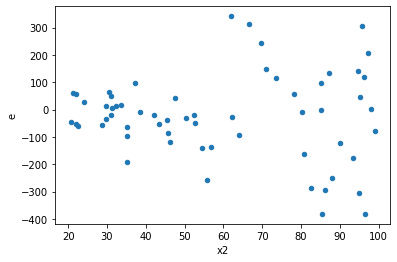

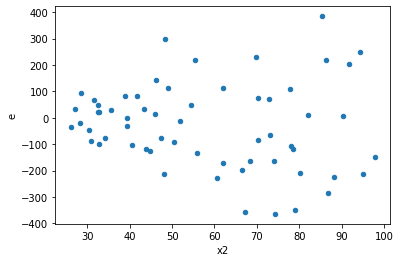

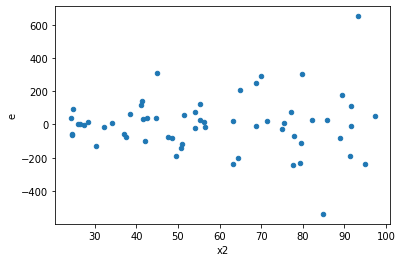

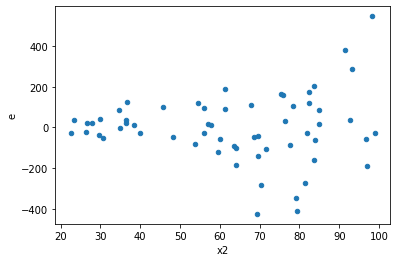

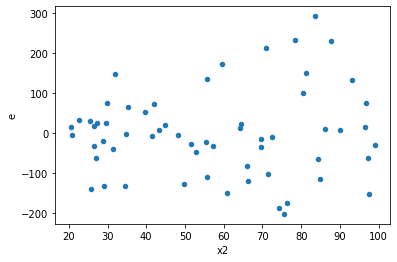

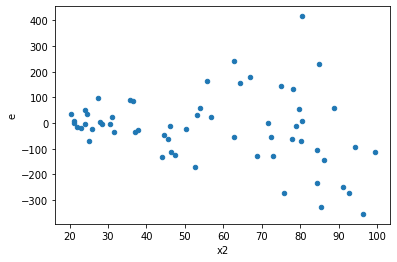

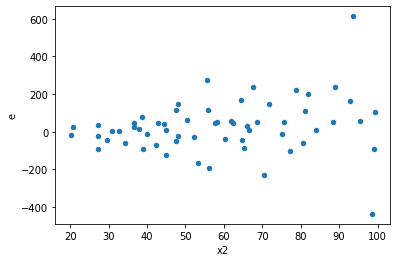

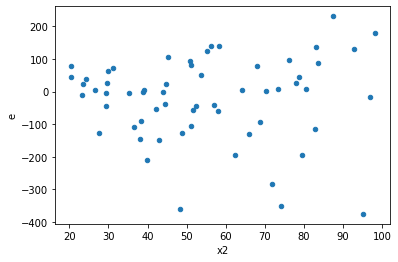

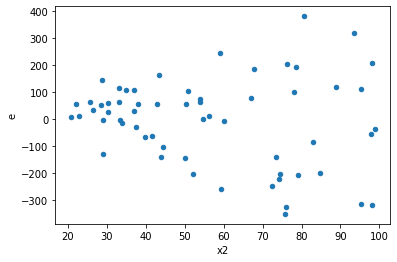

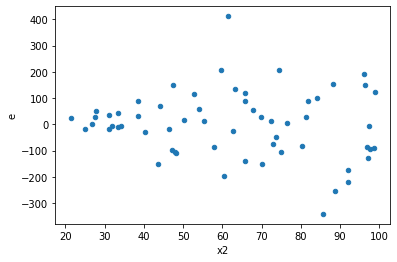

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,224813.93955618376,865133.1495072963,10705.425693151608,41196.816643204584,3.84821844773148,0.0032030581338808872,0.9983984709330596,0.0016015290669404436,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,78891.1267575496,706034.816946268,3756.7203217880765,33620.705568869904,8.9494832431038,4.838011785857077e-06,0.9999975809941071,2.4190058929285385e-06,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,318945.92550124123,341275.31800015667,15187.90121434482,16251.20561905508,1.070009963174239,0.8782419960882284,0.5608790019558858,0.4391209980441142,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,170771.8656636403,607758.1518425148,8131.99360303049,28940.864373453085,3.5588892203097537,0.005324582453050786,0.9973377087734746,0.002662291226525393,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,331260.8535350107,566844.3248494327,15774.326358810034,26992.58689759203,1.7111720832703925,0.22660050230410067,0.8866997488479497,0.11330025115205034,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,394250.7102750317,594505.9274316527,18773.84334643008,28309.806068173937,1.5079387606351344,0.3540304388074018,0.8229847805962991,0.1770152194037009,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,198231.16498286862,596019.5061259808,9439.579284898506,28381.881244094322,3.0066892164886863,0.014922830067144677,0.9925385849664277,0.007461415033572338,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,437048.6159187523,440185.7513512353,20811.83885327392,20961.22625482073,1.007178001069488,0.9870794343397233,0.5064602828301383,0.49353971716986167,Reject005=1 : Homoscedasticity
9.0,21.0,21.0,173385.52509897767,818988.7191361745,8256.453576141794,38999.46281600831,4.723512638489587,0.0007761437465974019,0.9996119281267013,0.00038807187329870096,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,224813.93955618376,865133.1495072963,10705.425693151608,41196.816643204584,3.84821844773148,0.0032030581338808872,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,78891.1267575496,706034.816946268,3756.7203217880765,33620.705568869904,8.9494832431038,4.838011785857077e-06,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,318945.92550124123,341275.31800015667,15187.90121434482,16251.20561905508,1.070009963174239,0.8782419960882284,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,170771.8656636403,607758.1518425148,8131.99360303049,28940.864373453085,3.5588892203097537,0.005324582453050786,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,331260.8535350107,566844.3248494327,15774.326358810034,26992.58689759203,1.7111720832703925,0.22660050230410067,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,526037.0947399816,351779.9607433939,25049.385463808645,16751.426702066376,0.668736034513455,0.36386677400850825,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,394250.7102750317,594505.9274316527,18773.84334643008,28309.806068173937,1.5079387606351344,0.3540304388074018,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,198231.16498286862,596019.5061259808,9439.579284898506,28381.881244094322,3.0066892164886863,0.014922830067144677,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,437048.6159187523,440185.7513512353,20811.83885327392,20961.22625482073,1.007178001069488,0.9870794343397233,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      514
Reject005=0 : Heteroscedasticity    486
Name: Result_test, dtype: int64